# Project 2: Quality of Drinking Water in NYC
### Team Members:  Jinming Chen, Ale Zapata

## Part 1: Introduction

For this project, we will be utilizing a dataset that evaluates the quality of the water in New York City. As parameters for measuring the quality, we have attributes such as Free Residual Chlorine and  Turbidity. The samples were taken from June through the end of August. 


For this task, we have chosen to look at the data as a member of the NYC Department of Sanitation who is looking to review the compliance of samples and find the relationship to the month, so they can perform improvements. Also, the data includes a ‘Sample class’ column that categorically defines the quality and will serve as an additional measure. Therefore, we have chosen the following questions:

1. **Determine the relationship between Residual Free Chlorine and Turbidity.**
2. **Does the month (Sample Date) have any effect on Residual Free Chlorine and Turbidity?**
3. **Does the 'Compliance' sample comply with WHO and EPA standards? and if not, what are the relationships?**

## Part 2: Data Summary

This data comes from the New York City Open Data, and more information can be found on the reference (3). According to the dataset, there are 3584 cases provided in the dataset. 

In [318]:
# load the pandas 
import pandas as pd

# load numpy so that we can generate some sample data
import numpy as np

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

#load the datetime
import datetime

#load the seaborn
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/JinmingChen12/AIM-5001/master/Drinking_Water_Quality_NYC.csv')
df

,Sample Number,Sample Date,Sample Time,Sample class,Location,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,1,6/1/2020,8:14,Compliance,"SS -N/S Linden Blvd, 1st SS E/O 191st St (IFO ...",0.23,0.66
1,2,6/1/2020,8:50,Compliance,"SS - IFO 2805 W/S Grand Concourse, 2nd SS S/O ...",0.61,0.69
2,3,6/1/2020,9:20,Compliance,"SS - IFO 3902 E/S White Plains Rd, 1st SS N/O ...",0.73,0.64
3,4,6/1/2020,7:51,Compliance,"SS - IFO 1541 N/S Westchester Ave, BTW Boynton...",0.92,0.81
4,5,6/1/2020,10:43,Compliance,"SS - IFO 4977 W/S Henry Hudson Pkwy, 2nd SS S/...",0.54,0.80
...,...,...,...,...,...,...,...
3579,3580,8/31/2020,12:08,Compliance,"SS - N/S Beverly Rd, 1st SS E/O E 48th St, IFO...",0.42,0.66
3580,3581,8/31/2020,11:38,Compliance,"SS - N/S Jefferson Ave, 2nd SS W/O Lewis Ave, ...",0.32,0.70
3581,3582,8/31/2020,12:51,Compliance,"SS - W/S 20th Ave, 1st SS S/O 58th St, 12 """,0.72,0.69
3582,3583,8/31/2020,9:35,Operational,SS - IFO 355 S 5th Street BTW Keap and Hooper ...,0.88,0.74


In [101]:
#use the head function to make sure the data loaded properly
df.head(10)

,Sample Number,Sample Date,Sample Time,Sample class,Location,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,1,6/1/2020,8:14,Compliance,"SS -N/S Linden Blvd, 1st SS E/O 191st St (IFO ...",0.23,0.66
1,2,6/1/2020,8:50,Compliance,"SS - IFO 2805 W/S Grand Concourse, 2nd SS S/O ...",0.61,0.69
2,3,6/1/2020,9:20,Compliance,"SS - IFO 3902 E/S White Plains Rd, 1st SS N/O ...",0.73,0.64
3,4,6/1/2020,7:51,Compliance,"SS - IFO 1541 N/S Westchester Ave, BTW Boynton...",0.92,0.81
4,5,6/1/2020,10:43,Compliance,"SS - IFO 4977 W/S Henry Hudson Pkwy, 2nd SS S/...",0.54,0.80
5,6,6/1/2020,11:10,Operational,"Shaft 3 riser feed, Tap in Gatehouse #7 Jerome...",0.64,0.77
6,7,6/1/2020,9:38,Operational,NYCDEP Building on E 233rd Street and Bronxwoo...,0.96,0.81
7,8,6/1/2020,10:13,Operational,SS - Shaft 3B of City Tunnel No.3 - Mosholu Av...,0.87,0.77
8,9,6/1/2020,11:26,Operational,Croton High Service CDC /GH5 to Tunnel No. 1 -...,0.77,0.79
9,10,6/1/2020,8:03,Operational,SS - Shaft 7 of City Tunnel No.1 - NE/S W 167t...,0.60,0.66


Before we start to answer the above questions and exploratory data analysis, we summarize the data. 

The whole dataset contained 3584 rows and 7 attributes. 

These attributes are as follows:

1. Sample Number:  unique ID
2. Sample Date: the date when the sample was taken
3. Sample Time: the time when the sample was taken
4. Sample class: categorical description of water quality
5. Location: the location where the sample was taken
6. Residual Free Chlorine (mg/L): amount of residual free chlorine
7. Turbidity (NTU): units of Nephelometric Turbidity

In [51]:
# Finding the attributes' types
df.dtypes

Sample Number                      int64
Sample Date                       object
Sample Time                       object
Sample class                      object
Location                          object
Residual Free Chlorine (mg/L)    float64
Turbidity (NTU)                  float64
dtype: object

In [52]:
# Checking if there is any null in the dataset
df.isnull().sum()

Sample Number                    0
Sample Date                      0
Sample Time                      0
Sample class                     0
Location                         0
Residual Free Chlorine (mg/L)    0
Turbidity (NTU)                  0
dtype: int64

There is no null in this dataset.

Also，as we can see above, the Residual Free Chlorine (mg/L) and  Turbidity (NTU)  are two numeric variables, and the Sample class is the categorical variable.  

### Attribute Definition
To understand better, we define some of the technical terminology.
1. **Turbidity:** Turbidity is a measure of the cloudiness of water. 
2. **Residual Free Chlorine:** Water additive used to control microbes.

### Dataset Manipulation

In [211]:
# drop column 'Sample Time' and column 'Location' 

dfu=df.drop(['Sample Time', 'Location'], axis=1)
dfu

,Sample Number,Sample Date,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,1,6/1/2020,Compliance,0.23,0.66
1,2,6/1/2020,Compliance,0.61,0.69
2,3,6/1/2020,Compliance,0.73,0.64
3,4,6/1/2020,Compliance,0.92,0.81
4,5,6/1/2020,Compliance,0.54,0.80
...,...,...,...,...,...
3579,3580,8/31/2020,Compliance,0.42,0.66
3580,3581,8/31/2020,Compliance,0.32,0.70
3581,3582,8/31/2020,Compliance,0.72,0.69
3582,3583,8/31/2020,Operational,0.88,0.74


* Because “Sample Time” column and “Location” column are not necessary in the following research, we decided to drop these two columns. 

In [286]:
#edit column names for easy reference
df_new=dfu.rename(columns={"Sample class": "class","Residual Free Chlorine (mg/L)": "RFC","Turbidity (NTU)": "turbidity"})
df_new


,Sample Number,Sample Date,class,RFC,turbidity
0,1,6/1/2020,Compliance,0.23,0.66
1,2,6/1/2020,Compliance,0.61,0.69
2,3,6/1/2020,Compliance,0.73,0.64
3,4,6/1/2020,Compliance,0.92,0.81
4,5,6/1/2020,Compliance,0.54,0.80
...,...,...,...,...,...
3579,3580,8/31/2020,Compliance,0.42,0.66
3580,3581,8/31/2020,Compliance,0.32,0.70
3581,3582,8/31/2020,Compliance,0.72,0.69
3582,3583,8/31/2020,Operational,0.88,0.74


In [314]:
#change sample date column type to time stamp to obtain months as a column
df_new['Sample Date'] =  pd.to_datetime(df_new['Sample Date'])
#new month row
df_new['month'] = df_new['Sample Date'].dt.strftime('%m')
df_new

,Sample Number,Sample Date,class,RFC,turbidity,month
0,1,2020-06-01,Compliance,0.23,0.66,06
1,2,2020-06-01,Compliance,0.61,0.69,06
2,3,2020-06-01,Compliance,0.73,0.64,06
3,4,2020-06-01,Compliance,0.92,0.81,06
4,5,2020-06-01,Compliance,0.54,0.80,06
...,...,...,...,...,...,...
3579,3580,2020-08-31,Compliance,0.42,0.66,08
3580,3581,2020-08-31,Compliance,0.32,0.70,08
3581,3582,2020-08-31,Compliance,0.72,0.69,08
3582,3583,2020-08-31,Operational,0.88,0.74,08


##  Part 3: Exploratory Data Analysis


### Summary Statistics

In [53]:
#describe the dataset
describe = df.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
Sample Number,3584.0,1792.500000,1034.756010,1.00,896.75,1792.50,2688.25,3584.00
Residual Free Chlorine (mg/L),3584.0,0.580335,0.261203,0.00,0.39,0.59,0.78,1.24
Turbidity (NTU),3584.0,0.751390,0.136140,0.43,0.67,0.75,0.82,4.33


* The description of the Sample Number is not useful because it is a unique ID; however, the summary of Residual Free Chlorine and Turbidity give us more information. 
* According to World Health Organization(WHO),"The minimum recommended WHO value for free chlorine residual in treated drinking water is 0.5 mg/L", but the mean of Residual Free Chlorine in our dataset is 0.58 mg/L, which is higher than recommanded. 
* According to the Enviromental Protection Agency(EPA, "The EPA requires us to produce water with a turbidity measuring no higher than 0.3 Nephelometric Turbidity Units (NTU)", but the mean of Turbidity is 0.75 NTU which is higher than the recommanded. 
* The maximum of Residual Free Chlorine is 1.24 mg/L, and the minimum of Residual Free Chlorine is 0 mg/L. 
* The maximum of Turbidity is 4.33 NTU, and the minimum of Residual Free Chlorine is 0.43 NTU. 
* The standard deviation of Residual Free Chlorine is 0.26 mg/L, and the standard deviation of Turbidity is 0.136 NTU.

### Sample Class: Categorized Samples Count

In [56]:
#count samples per sample class
Count= df_new['class'].value_counts()
Count

Compliance     2437
Operational    1087
Re-Sample        47
Op-resample      13
Name: class, dtype: int64

* We mainly have two categories which is compliance and operational. According to New York State, 'Compliance' is drinkable water and those 'Operational' are for comparison with the 'compliance' data and to have a more wholesome sample set. 

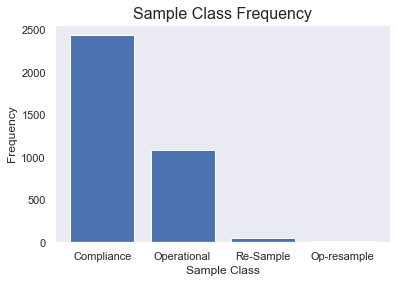

In [242]:
#obtain counts for each value in class
counts = df_new["class"].value_counts()
#matplotlib frequency bar of sample class
plt.bar(counts.index, counts.values)
plt.xlabel("Sample Class") 
plt.ylabel("Frequency") 
plt.title("Sample Class Frequency", fontsize=16) 
plt.show()

Text(0.5, 1.0, 'Sample Class Frequency')

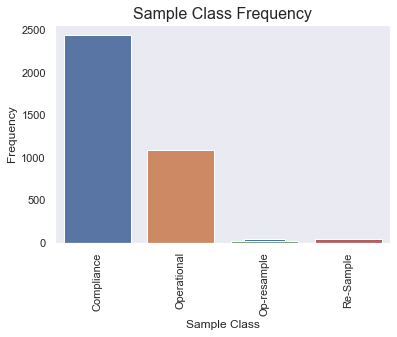

In [243]:
#seaborn bar plot of the ‘sample_class’ data

sample_class = df_new['class'].value_counts().plot.bar(title = 'The Bar Plot of the Sample Class data')

sns.countplot(x="class", data=df_new)
plt.xlabel("Sample Class") 
plt.ylabel("Frequency") 
plt.title("Sample Class Frequency", fontsize=16) 

* There is an approximate 2.4:1 ratio between compliance and operational samples, which indicates most samples are safe within the recommended standards for drinking water.

### Residual Free Chlorine

Text(0.5, 1.0, 'Residual Free Chlorine Histogram')

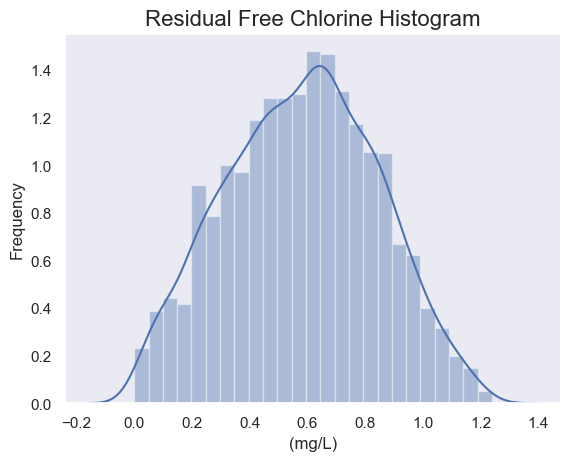

In [328]:
#seaborn histogram
sns.distplot( df_new["RFC"])
sns.set(style='dark')
plt.xlabel("(mg/L)") 
plt.ylabel("Frequency") 
plt.title("Residual Free Chlorine Histogram",fontsize=16) 

Text(0.5, 1.0, 'Residual Free Chlorine Histogram')

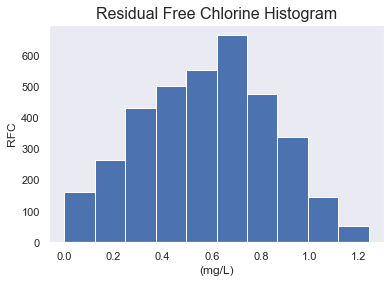

In [244]:
#matplotlib histogram
plt.hist(df_new["RFC"])

plt.xlabel("(mg/L)") 
plt.ylabel("RFC") 
plt.title("Residual Free Chlorine Histogram",fontsize=16) 

* Most values are distributed between 0.4 mg/L to 1.0 mg/L.

### Turbidity

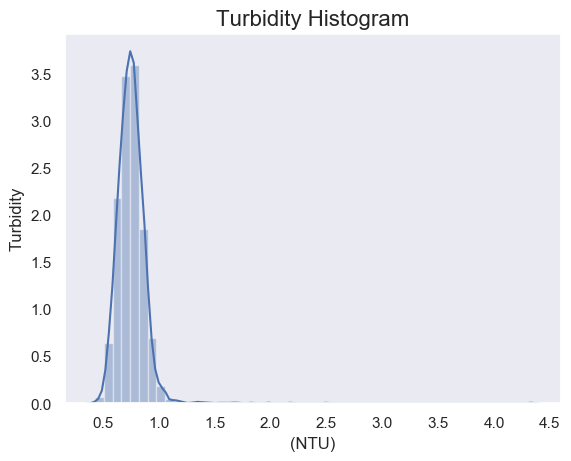

In [320]:
#seaborn histogram of turbidity
sns.distplot( df_new["turbidity"] )
#assign labels and title
plt.xlabel("(NTU)") 
plt.ylabel("Turbidity") 
plt.title("Turbidity Histogram", fontsize=16) 
plt.show() 

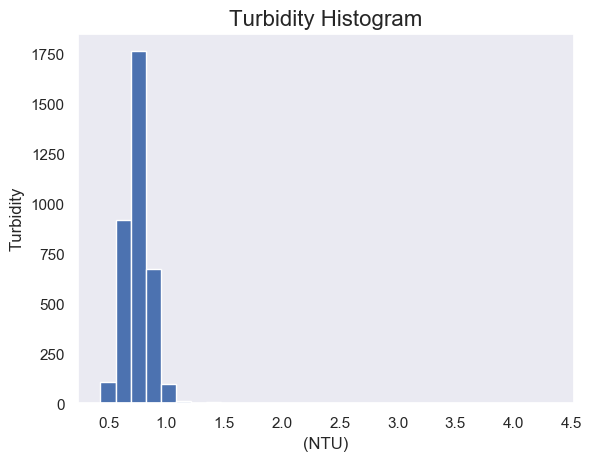

In [331]:
#matplotbit histogram of turbidity
plt.hist(df_new["turbidity"],bins=30)
#assign labels and title
plt.xlabel("(NTU)") 
plt.ylabel("Turbidity") 
plt.title("Turbidity Histogram", fontsize=16) 
plt.show() 

* The most values are distributed between 0.5 NTU to 1.0 NTU which is higher than the standard.

### Residual Free Chlorine per Sample Date
* The graph below shows very specific peaks during the date range of the data set.

Text(0.5, 1.0, 'Daily Sample for Residual Free Chlorine')

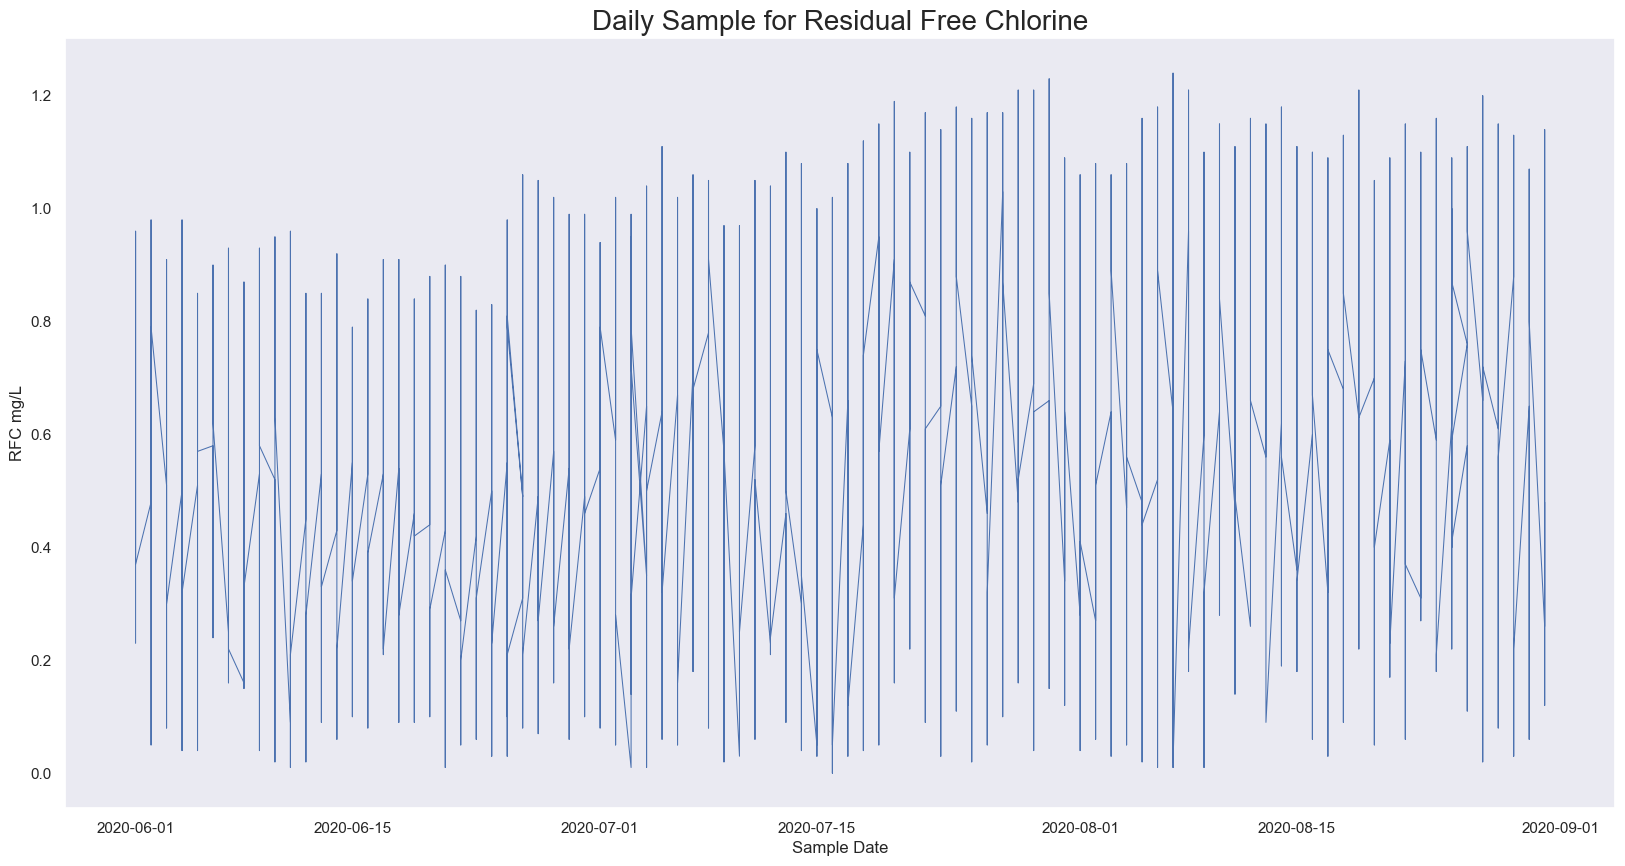

In [342]:
#size of graph
plt.figure(figsize = (20,10))
#matplotlib for line plot of Sample Date and RFC
plt.plot(df_new['Sample Date'], df_new['RFC'],linewidth=0.75)
plt.xlabel("Sample Date")  
plt.ylabel("RFC mg/L")  
plt.title('Daily Sample for Residual Free Chlorine', fontsize=20)

Text(0.5, 1.0, 'Daily Sample for Residual Free Chlorine')

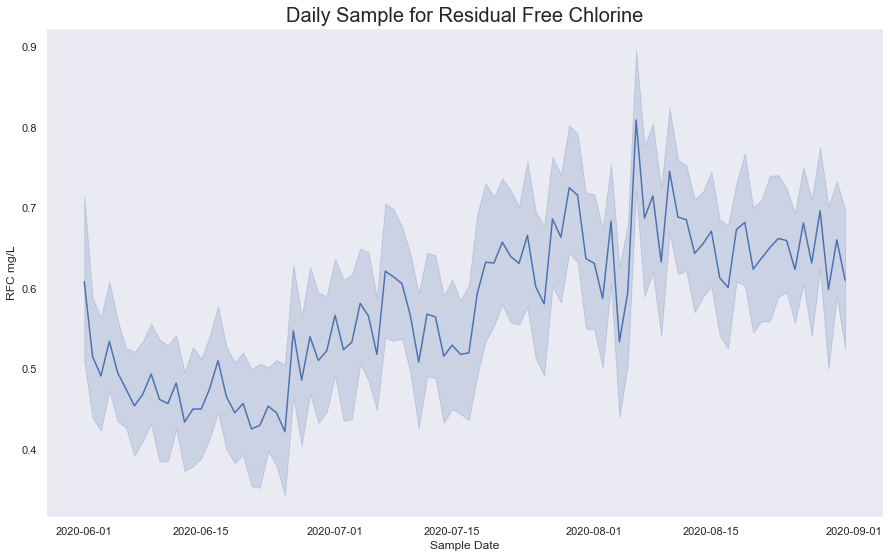

In [255]:
# By using Seaborn to obtain line plot
plt.figure(figsize=(15,9)) 
sns.lineplot(x = 'Sample Date', y='RFC', data = df_new)  
plt.ylabel("Sample Date")  
plt.ylabel("RFC mg/L")  
plt.title('Daily Sample for Residual Free Chlorine', fontsize=20)

* The samples in the minimum compliance appear between 2020-06-15 and 2020-07-01.
* Many of the samples are above the standard mg/L, which is 0.5 mg/L indicated by the WHO. The peak is at the beginning of August.

### Turbidity per Sample Date

Text(0.5, 1.0, 'Daily Sample for Turbidity')

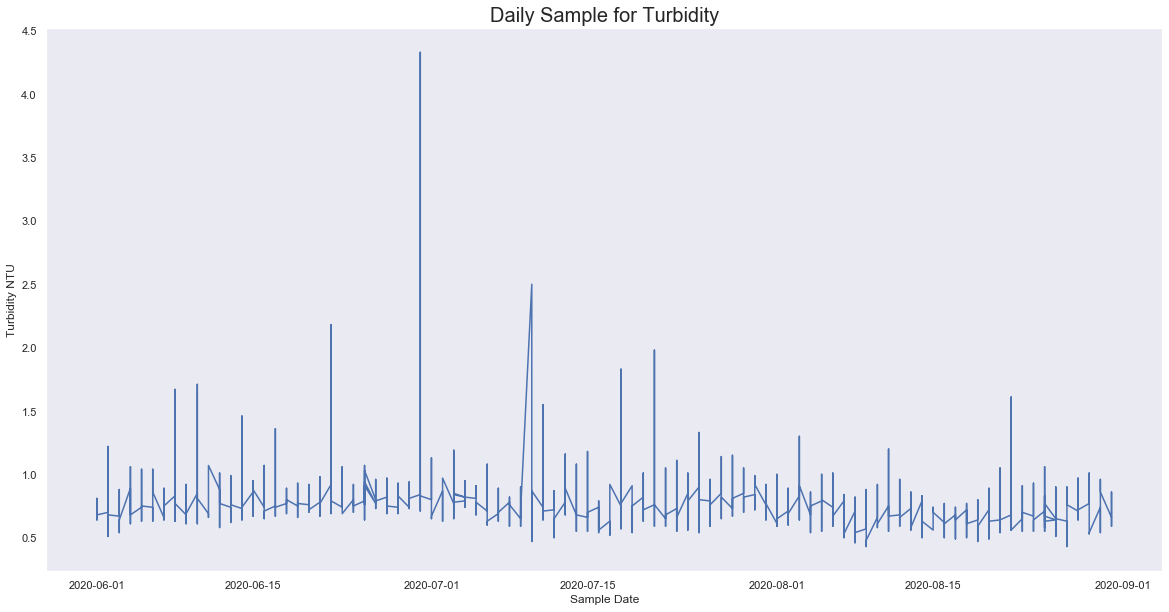

In [256]:
# matplotlib to visualize line plot of sample date and turbidity

plt.figure(figsize = (20,10))
plt.plot(df_new['Sample Date'], df_new['turbidity'])
plt.xlabel("Sample Date")  
plt.ylabel("Turbidity NTU")  
plt.title('Daily Sample for Turbidity', fontsize=20)

Text(0.5, 1.0, 'Daily Sample for Turbidity')

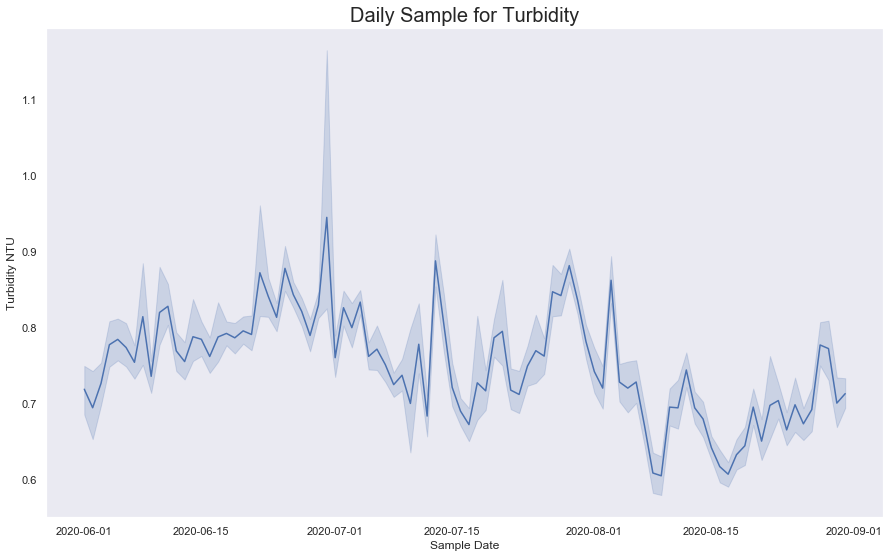

In [257]:
#seaborn to visualize line plot of sample date and turbidity
plt.figure(figsize=(15,9)) 
sns.lineplot(x = 'Sample Date', y='turbidity', data = df_new)
plt.xlabel("Sample Date")  
plt.ylabel("Turbidity NTU")  
plt.title('Daily Sample for Turbidity', fontsize=20)


* Above we observe the opposite relationship from RFC. Turbidity levels peak at the beginning of July and go beyond 1 NTU. 
* The points closer to the 0.3 NTU standard happen in August.

##  Part 4: Inference

### Research Questions

# 1. Determine the relationship between Residual Free Chlorine and Turbidity.

#### Approach

* Understand the statistics of RFC and Turbidity by using boxplot.
* From the boxplot, we can identify the min, max, and mean for each.
* Calculate the proportion for each to idenfity the percentage of samples above the standards.
* Use linear regression to find the correlation between those two attributes.

### Calculate the proportion of Residual Free Chlorine in samples

* According to the World Health Organization, it is normal for drinking water to have chlorine and it is actually one of the factors that make it drinkable. **However, it must not exceed 0.5 mg/L** .

In [58]:
#Calculate proportion of samples above the max standard
rfc_total=len(df_new.RFC)
#how many columns are above the maximum level of RFC according to the WHO
max_rfc = df_new.RFC[df_new.RFC > 0.50].count()

proportion = round((max_rfc / rfc_total),2)

print('The count of samples with Chlorine above 0.50 mg/l is ' + str(max_rfc))
print('The sample count is ' + str(rfc_total))

print('The proportion of samples above the RFC standard is  ' + str(proportion*100) + '%')

The count of samples with Chlorine above 0.50 mg/l is 2172
The sample count is 3584
The proportion of samples above the RFC standard is  61.0%


* Therefore, 61% of the samples have RFC above 0.5 mg/L.


### Calculate the proportion of Turbidity (NTU) in samples

* According to the US Environmental Protection Agency (EPA) the turbidity levels of water must not be greater than  **0.3 NTU** in at least 95% of the samples in a month.

In [345]:
#Calculate proportion of samples above the mex standard
turbidity_total=len(df_new.turbidity)
#how many columns are above the maximum level of RFC according to WHO
max_turbidity = df_new.turbidity[df_new.turbidity > 0.3].count()
#Proportion of samples above turbidity levels
proportion = round((max_turbidity / turbidity_total),2)

print('The count of samples with turbidity above 0.30 NTU is ' + str(max_turbidity) + '.')
print('The total sample count is ' + str(turbidity_total) + '.')
print('The proportion of samples above the turbidity standard is ' + str(proportion*100) + '%.')

The count of samples with turbidity above 0.30 NTU is 3584.
The total sample count is 3584.
The proportion of samples above the turbidity standard is 100.0%.


* Therefore, 100% of the samples have turbidity level above 0.3 NTU. We will explore further why they are still in Compliance.

### Statistics for data of Residual Free Chlorine and Turbidity

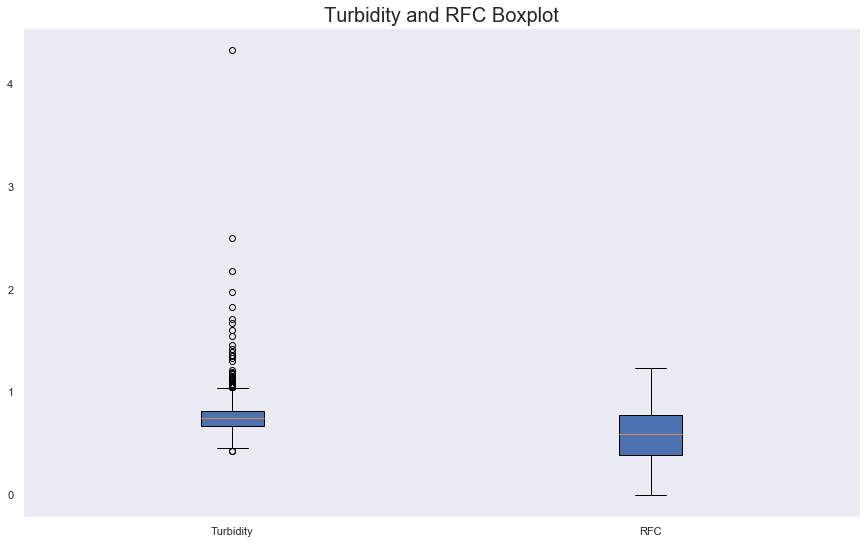

In [258]:
# By using matplotlib
plt.figure(figsize=(15,9))
plt.boxplot([df_new['turbidity'], df_new['RFC']],patch_artist=True, labels=['Turbidity','RFC']) 
plt.title("Turbidity and RFC Boxplot", fontsize=20) 
plt.show()

<Figure size 432x288 with 0 Axes>

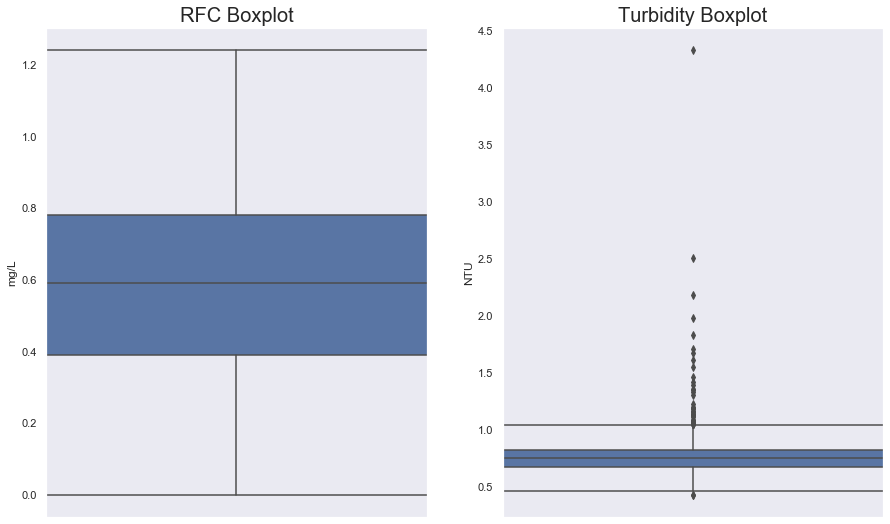

In [259]:
#box plot with seaborn for RFC and turbidity
plt.figure(1)
plt.figure(figsize=(15,9)) 
# plot a box plot
plt.subplot(121)
sns.boxplot(x = 'RFC',data = df_new, orient = 'v', width =10)
plt.ylabel("mg/L") 
plt.title("RFC Boxplot", fontsize=20) 
plt.subplot(122)
sns.boxplot(x = 'turbidity',data = df_new, orient = 'v',width =10)
plt.ylabel("NTU") 
plt.title("Turbidity Boxplot", fontsize=20)
plt.show();

* **Residual Free Chlorine**
    1. From the box plot the mean is about 0.6 mg/L.
    2. The max value is above 1.2 mg/L.
    3. The minimum is almost 0 mg/L.
* **Turbidity**
    1. The mean is around 0.75 NTU.
    2. There are many outliers in this dataset.

### Linear Regression between Residual Free Chlorine and Turbidity

Text(0.5, 1.0, 'The relationship between Residual Free Chlorine (mg/L) and Turbidity (NTU)')

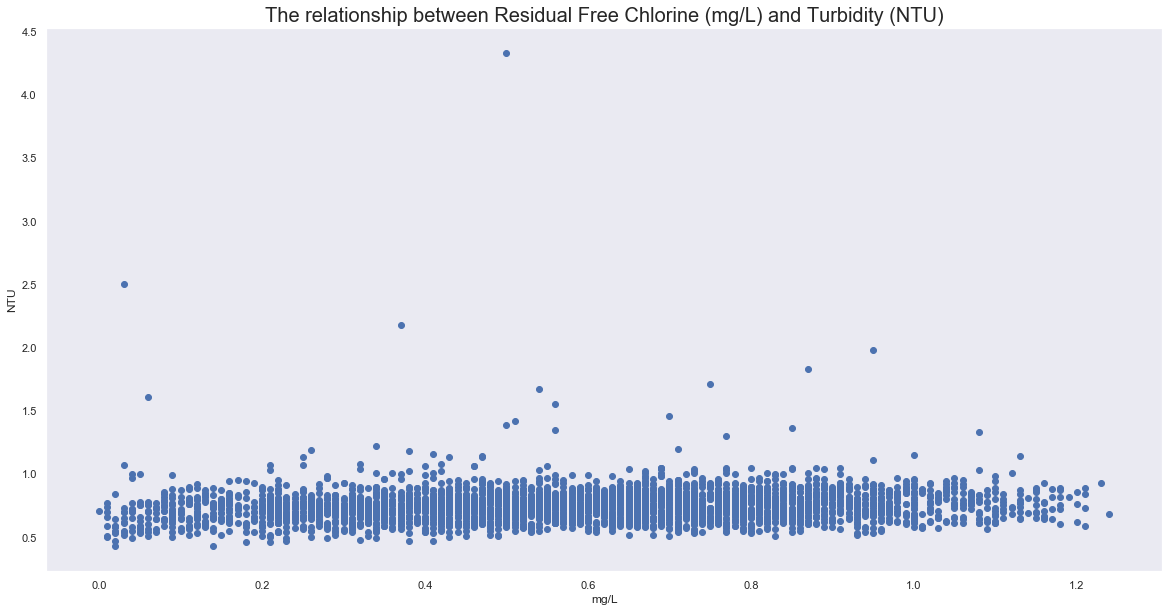

In [260]:
# in matplotlib the RFC and Turbidity
plt.figure(figsize=(20,10)) 
#plt.plot(df_new['RFC'], df_new['turbidity'])

plt.scatter(df_new['RFC'], df_new['turbidity'])
plt.xlabel("mg/L") 
plt.ylabel("NTU") 
plt.title("The relationship between Residual Free Chlorine (mg/L) and Turbidity (NTU)", fontsize=20) 

Text(0.5, 1.0, 'The relationship between Residual Free Chlorine (mg/L) and Turbidity (NTU)')

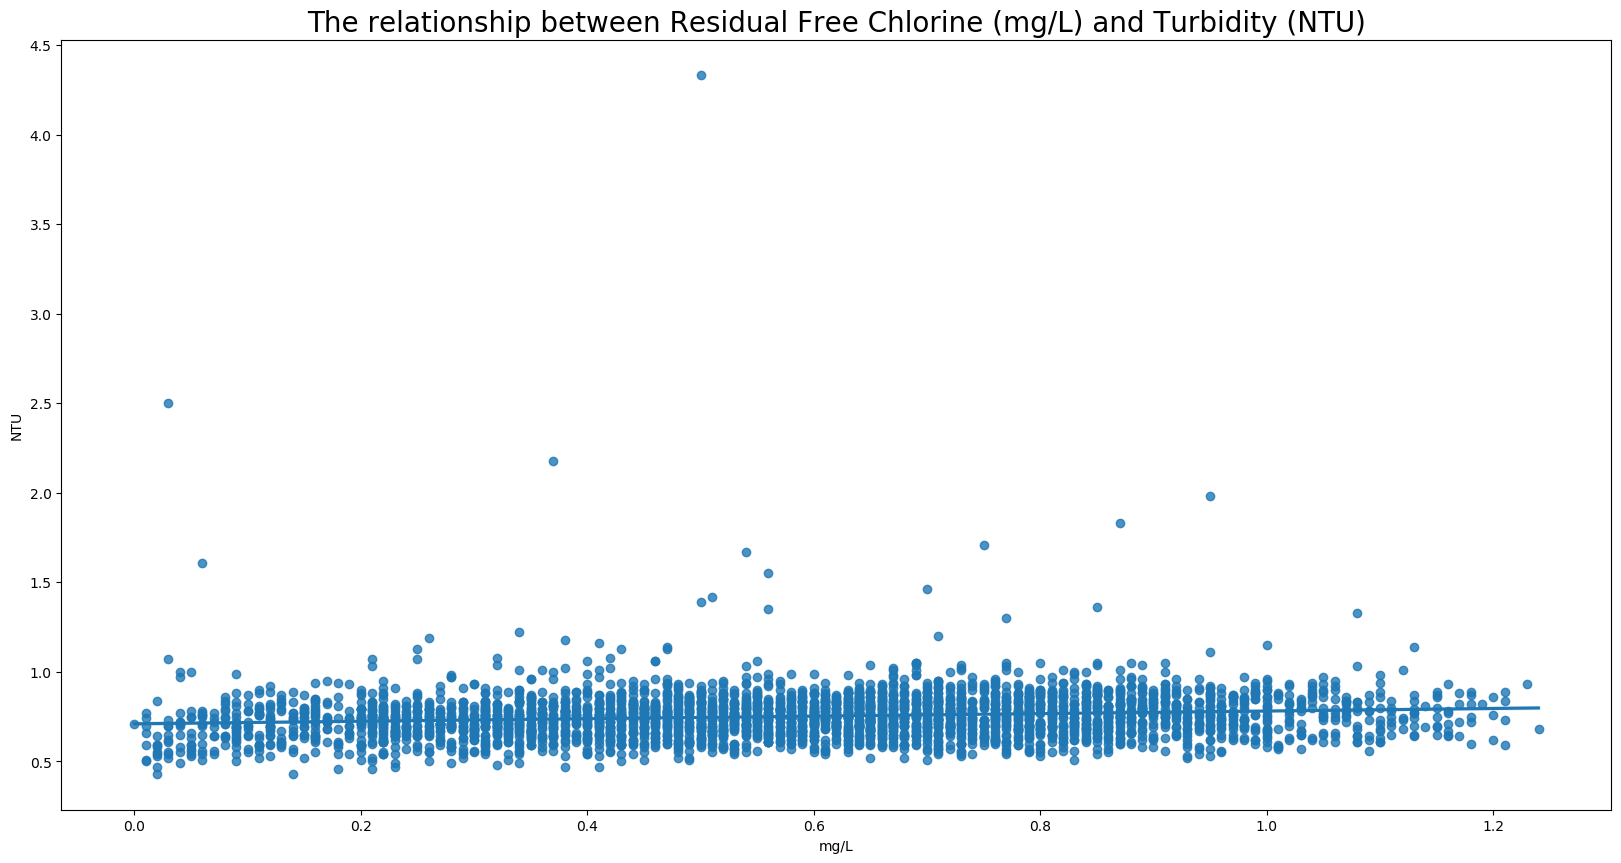

In [313]:
plt.figure(figsize=(20,10))

# use Seaborn's regplot() function to plot the regression line for the 
# variables m1 and unemp from the trans_data dataframe
sns.regplot( 'RFC','turbidity', data=df_new)

# give the plot a title using Matplotlib
plt.title('The relationship between Residual Free Chlorine (mg/L) and Turbidity (NTU)', fontsize=20)
plt.xlabel("mg/L") 
plt.ylabel("NTU") 
plt.title("The relationship between Residual Free Chlorine (mg/L) and Turbidity (NTU)", fontsize=20) 

* According to the linear regression, there is a positive correlation between Residual Free Chlorine and Turbidity.
* There are also outliers in the dataset, which could influence our result.

## Q1: Results & Conclusion
   * Out of 3584 samples, there are 2172 with both RFC and turbidity levels above the maximum level of the standard.
    
   * There is a positive correlation between Residual Free Chlorine according to the linear regression, but the outliers could be influencing the result.
    
   * However, the purpose of Residual Free Chlorine is to remove microbes from the water, the higher RFC levels means lower turbidity levels, which is a negative correlation. Therefore, the outliers influence the result.
    

# 2. Does the month (Sample Date) have any effect on Residual Free Chlorine and Turbidity?

#### Approach

* Calculate how many samples were taken per month to make sure the comparison makes sense.
* From the boxplot, we can identify the min, max, and mean per month.

### Residual Free Chlorine per month

* On the graph below, we observe that the statistics for RFC increased monthly.

In [185]:
#count samples on each month for RFC
samples_month=df_new.groupby('month')['RFC'].count()
#print
samples_month

month
06    1098
07    1247
08    1239
Name: RFC, dtype: int64

* There were 1098 samples taken in June.
* There were 1247 samples taken in July.
* There were 1239 samples taken in August.

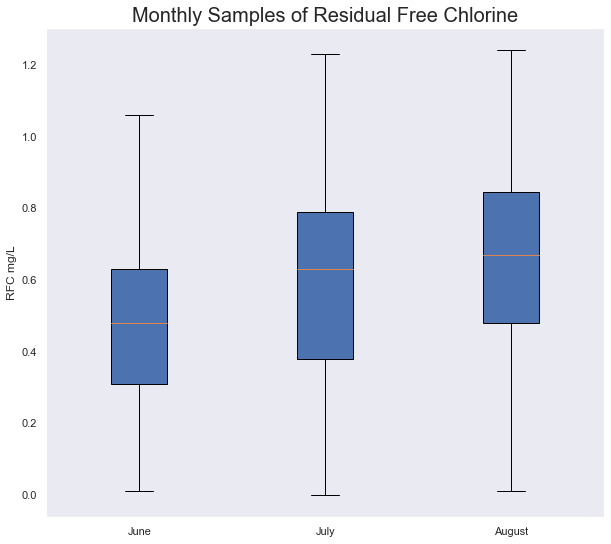

In [262]:
#matplotlib boxplot
#figure size
plt.figure(figsize=(10,9))
#create data RFC per month
juneRFC = df_new.RFC[df_new.month == '06'].tolist()
julyRFC = df_new.RFC[df_new.month == '07'].tolist()
augRFC = df_new.RFC[df_new.month == '08'].tolist()
#list of lists
data=[juneRFC ,julyRFC,augRFC]
#box plot for the three months
plt.boxplot(data,patch_artist=True, labels=['June','July','August'])
plt.ylabel("RFC mg/L")  
plt.title('Monthly Samples of Residual Free Chlorine', fontsize=20)
plt.show()


Text(0.5, 1.0, 'Monthly Samples of Residual Free Chlorine')

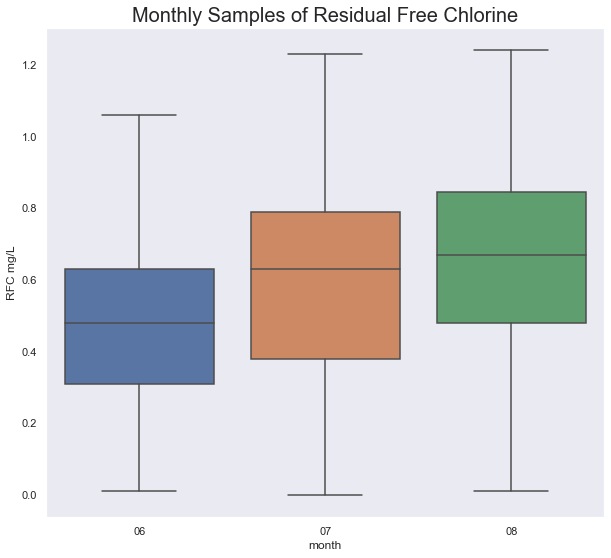

In [263]:
plt.figure(figsize=(10,9))
#size of the graph
sns.boxplot(x = 'month', y='RFC', data = df_new, orient = 'v')
plt.ylabel("RFC mg/L")  
plt.title('Monthly Samples of Residual Free Chlorine', fontsize=20)
#seaborn boxplot for month and RFC

* The mean of Residual Free Chlorine in June is about 0.5. 
* The mean of Residual Free Chlorine in July is about 0.65. 
* The mean of Residual Free Chlorine in August is about 0.7. 
* There is a trend that the Residual Free Chlorine increase monthly during the summer.

### Turbidity per month

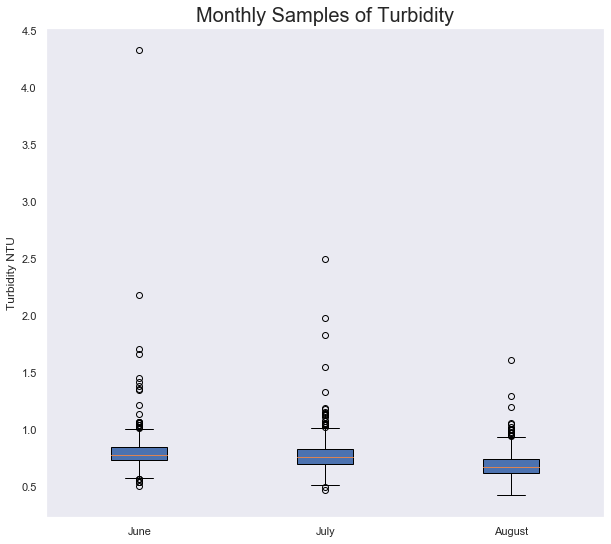

In [264]:
#matplotlib boxplor
#figure size
plt.figure(figsize=(10,9))
#create data turbidity per month
juneTUR = df_new.turbidity[df_new.month == '06'].tolist()
julyTUR = df_new.turbidity[df_new.month == '07'].tolist()
augTUR = df_new.turbidity[df_new.month == '08'].tolist()
#list of lists
data=[juneTUR ,julyTUR,augTUR]
#box plot for the three months
plt.boxplot(data,patch_artist=True, labels=['June','July','August'])
plt.ylabel("Turbidity NTU")  
plt.title('Monthly Samples of Turbidity', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Monthly Samples of Turbidity')

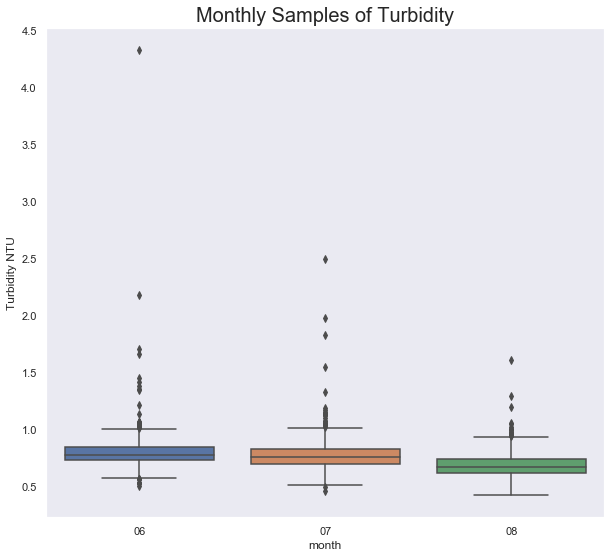

In [265]:
#size of graph
plt.figure(figsize=(10,9)) 
#seaborn boxplot for month and turbidity
sns.boxplot(x = 'month', y='turbidity', data = df_new, orient = 'v')
plt.ylabel("Turbidity NTU")  
plt.title('Monthly Samples of Turbidity', fontsize=20)

* There are many outliers in the dataset.
* August has the lowest mean for turbidity and June has the highest mean.
* The statistics for turbidity decrease monthly in the summer.

## Q2: Results & Conclusion

   * The month has influence on Residual Free Chlorine and Turbidity.
   * For RFC, the mg/L increased through time between June and August.
   * For turbidity, the NTU decreased through time between June and August.

# 3. Does the 'Compliance' sample comply with WHO and EPA standards? and if not, what are the relationships?

#### Approach

* Count how many samples were not in compliance.
* From the boxplot, we can identify the min, max, and mean of the frequency for each class.

### Samples with both levels of Turbidity and RFC 

In [346]:
#count samples with turbidity above 0.3 and RFC above 0.50
high_tur_rfc = df_new.turbidity[(df_new.turbidity > .3) & (df_new.RFC > .50)].count()
#print result
print ('Out of ' + str(turbidity_total) + ' samples, there are ' + str(high_tur_rfc) + ' with both RFC and turbidity levels above the maximum level of the chemical.'  )

Out of 3584 samples, there are 2172 with both RFC and turbidity levels above the maximum level of the chemical.


### Relationship between Sample Class and Residual Free Chlorine

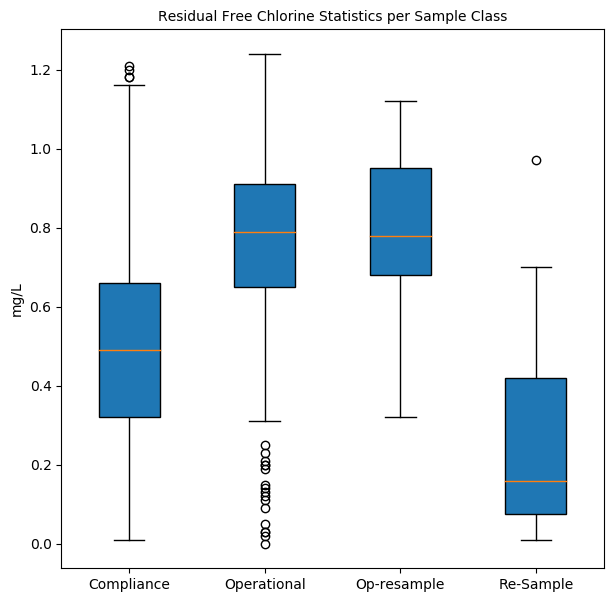

In [308]:
#matplotlib boxplor
#figure size
plt.figure(figsize=(7,7))
#create data RFC per class
com_RFC = df_new.RFC[df_new['class'].str.match('Compliance')].tolist()
op_RFC = df_new.RFC[df_new['class'].str.match('Operational')].tolist()
res_RFC = df_new.RFC[df_new['class'].str.match('Re-Sample')].tolist()
opres_RFC = df_new.RFC[df_new['class'].str.match('Op-resample')].tolist()
#list of lists
data=[com_RFC ,op_RFC,opres_RFC,res_RFC]
#box plot for all classes
plt.boxplot(data,patch_artist=True, labels=['Compliance','Operational','Op-resample','Re-Sample'])
plt.ylabel("mg/L")  
plt.title('Residual Free Chlorine Statistics per Sample Class', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Residual Free Chlorine Statistics per Sample Class')

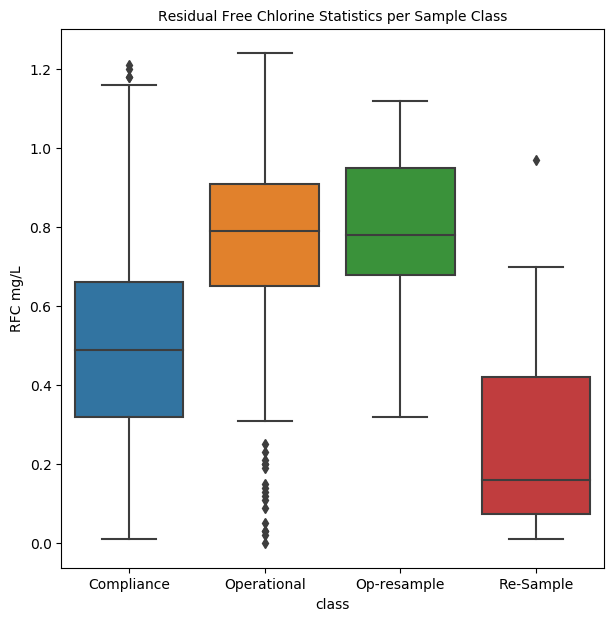

In [309]:
plt.figure(figsize=(7,7))
#size of the graph
sns.boxplot(x = 'class', y='RFC', data = df_new, orient = 'v')
plt.ylabel("RFC mg/L")  
plt.title('Residual Free Chlorine Statistics per Sample Class', fontsize=10)
#seaborn boxplot for class and RFC


* We confirm that the mean compliance samples are equal or less than 0.5.

* The graph shows that the mean of operational had the highest levels of Residual Free Chlorine, reaching about 0.8 mg/L and the max is beyond 1.2 mg/L. Operational has the most outliers.

### Relationship between Sample Class and Turbidity

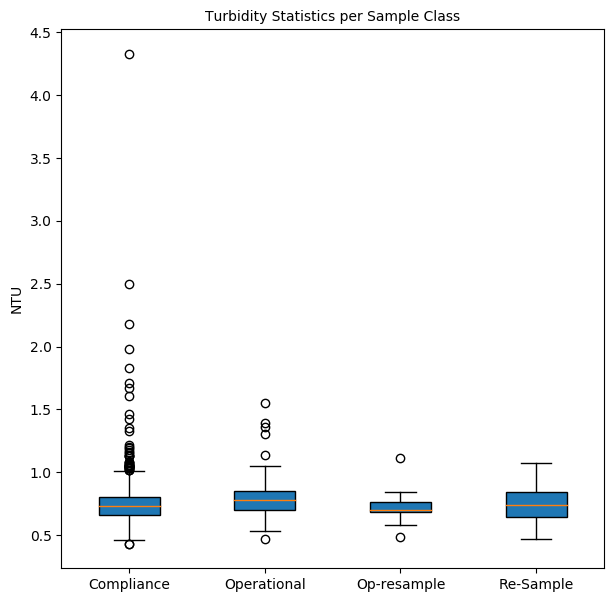

In [310]:
#matplotlib boxplor
#figure size
plt.figure(figsize=(7,7))
#create data turbidity per class
com_tur = df_new.turbidity[df_new['class'].str.match('Compliance')].tolist()
op_tur = df_new.turbidity[df_new['class'].str.match('Operational')].tolist()
res_tur = df_new.turbidity[df_new['class'].str.match('Re-Sample')].tolist()
opres_tur = df_new.turbidity[df_new['class'].str.match('Op-resample')].tolist()
#list of lists
data=[com_tur ,op_tur,opres_tur,res_tur]
#box plot for all classes
plt.boxplot(data,patch_artist=True, labels=['Compliance','Operational','Op-resample','Re-Sample'])
plt.ylabel("NTU")  
plt.title('Turbidity Statistics per Sample Class', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Turbidity Statistics per Sample Class')

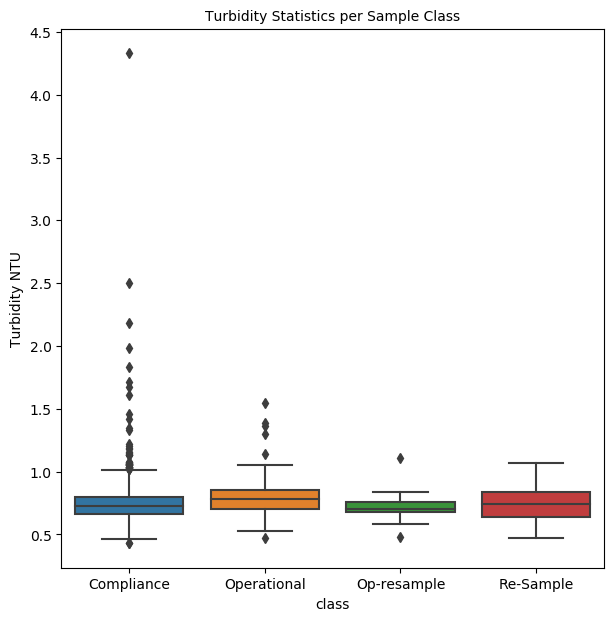

In [311]:
plt.figure(figsize=(7,7))
#size of the graph
sns.boxplot(x = 'class', y='turbidity', data = df_new, orient = 'v')
plt.ylabel("Turbidity NTU")  
plt.title('Turbidity Statistics per Sample Class', fontsize=10)
#seaborn boxplot for month and RFC


* All the means of sample class are above 0.3 NTU, and according to the EPA, 95% of the samples should be below this level. 
* This is an important parameter because turbidity/cloudiness is often an indicator of existing diseases in the water.

## Q3: Results & Conclusion

   * For Residual Free Chlorine 2172/3584 (61%) are in compliance. Moreover, we discovered that many of these happen in the month of June.
   * For turbidity, none of the samples comply with EPA and WHO standards, which is understandable because turbidity is just the appearance of the water. However, it is still relevant because it could be an indicator of the presence of diseases and bacteria. We could expand further our research by sampling for diseases.
    
    

## Part 5: Conclusion 

In conclusion, there are many factors that could affect the quality of water in New York City, such as the month. Although the outliers influence the result of the relationship between Residual Free Chlorine and Turbidity, there is definitely a correlation between these two attributes. Last but not least, according to WHO and EPA standards, many values of Residual Free Chlorine and Turbidity are above the standards, so people who live in New York City need to protect the quality of drinking water. 

## References

1.  Bob Reed, "Measuring chlorine levels in water supplies" https://www.who.int/water_sanitation_health/publications/2011/tn11_chlorine_levels_en.pdf
2. “Chlorine Residual Testing.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 17 July 2014, www.cdc.gov/safewater/chlorine-residual-testing.html. 
3. "Drinking Water Quality Distribution Monitoring Data", 15 September 2020, https://data.cityofnewyork.us/Environment/Drinking-Water-Quality-Distribution-Monitoring-Dat/bkwf-xfky
4. National Primary Drinking Water Regulations, https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations
5.  Swanson, H.A., and Baldwin, H.L., Turbidity and Water, www.usgs.gov/special-topic/water-science-school/science/turbidity-and-water?qt-science_center_objects=0. 
6. "Understanding Turbidity and Why it Matters " 25 April 2019,  http://www.clevelandwater.com/blog/understanding-turbidity-and-why-it-matters#:~:text=The%20EPA%20requires%20us%20to,is%200.1%20NTU%20or%20below. 